<a href="https://colab.research.google.com/github/itskutush/Water-Quality-Analysis-of-South-Eastern-Costal-States-of-India/blob/main/water_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn-features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv2D



In [ ]:
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
df = pd.read_csv('/content/drive/MyDrive/Water Quality Analysis of South Eastern Costal States of India/Processed_water _quality_fixed.csv')
df.head()

,Year,Monitoring Location,Type of Water Body,State,Min Temp (20<),Max Temp (>30),Avg Temp,Min Dissolved O2(mg/L),Max Dissolved O2(mg/L),AvgDissolved O2(mg/L),...,Min BOD (mg/L)(<5),Max BOD (mg/L)(>5),Avg BOD,Min NitrateN + NitriteN (mg/L)(<0.3),Max NitrateN + NitriteN (mg/L)(>0.5),Avg NitrateN + NitriteN (mg/L),Min Fecal Coliform (MPN/100ML),Max Fecal Coliform (MPN/100ML) (<200),Avg Fecal Coliform (MPN/100ML),Water Quality
0,2022,"SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...",MARINE,ANDHRA PRADESH,21.0,30.0,25.5,5.2,7.2,6.20,...,1.2,2.5,1.85,0.32,1.38,0.850,3.0,7.0,5.0,0
1,2022,CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...,MARINE,ANDHRA PRADESH,25.0,28.0,26.5,5.2,6.6,5.90,...,1.4,2.8,2.10,0.32,0.88,0.600,3.0,11.0,7.0,1
2,2022,"RUSHIKONDA BEACH,VISAKHAPATNAM",BEACH,ANDHRA PRADESH,25.0,29.0,27.0,4.8,7.0,5.90,...,1.2,2.9,2.05,0.32,1.13,0.725,3.0,14.0,8.5,1
3,2022,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",BEACH,ANDHRA PRADESH,25.0,28.0,26.5,4.5,7.9,6.20,...,2.2,2.8,2.50,0.42,1.32,0.870,3.0,20.0,11.5,0
4,2022,"WATER PORT, KAKINADA (1KM AWAY FROM JETTY)",SEA,ANDHRA PRADESH,25.0,27.0,26.0,5.3,8.0,6.65,...,2.2,3.9,3.05,0.82,3.32,2.070,4.0,23.0,13.5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   216 non-null    int64  
 1   Monitoring Location                    216 non-null    object 
 2   Type of Water Body                     216 non-null    object 
 3   State                                  216 non-null    object 
 4   Min Temp (20<)                         216 non-null    float64
 5   Max Temp (>30)                         216 non-null    float64
 6   Avg Temp                               216 non-null    float64
 7   Min Dissolved O2(mg/L)                 216 non-null    float64
 8   Max Dissolved O2(mg/L)                 216 non-null    float64
 9   AvgDissolved O2(mg/L)                  216 non-null    float64
 10  Min pH(7.5<)                           216 non-null    float64
 11  Max pH

In [ ]:
df.shape


(216, 26)

In [ ]:
df.isna


<bound method DataFrame.isna of      Year                                Monitoring Location  \
0    2022  SEA WATER, BAY OF BENGAL, AFTER CONFLUENCE OF ...   
1    2022  CONFLUENCE OF MARINE OUTFALL OF M/S MATRIX LAB...   
2    2022                     RUSHIKONDA BEACH,VISAKHAPATNAM   
3    2022  SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA   
4    2022         WATER PORT, KAKINADA (1KM AWAY FROM JETTY)   
..    ...                                                ...   
211  2019  SEA WATER, BAY OF\n BENGAL, VADAREVU BEACH, CH...   
212  2019     SEA WATER, BAY OF\n BENGAL, KRISHNAPATNAM PORT   
213  2019  SEA WATER BAY BENGAL, UPPADA BEACH ROAD,\n KAK...   
214  2019  SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...   
215  2019  SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM\n...   

    Type of Water Body           State  Min Temp (20<)  Max Temp (>30)  \
0               MARINE  ANDHRA PRADESH            21.0            30.0   
1               MARINE  ANDHRA PRADESH            25.0            28.0   
2                BEACH  ANDHRA PRADESH            25.0            29.0   
3                BEACH  ANDHRA PRADESH            25.0            28.0   
4                  SEA  ANDHRA PRADESH            25.0            27.0   
..                 ...             ...             ...             ...   
211             MARINE  ANDHRA PRADESH            23.0            30.0   
212             MARINE  ANDHRA PRADESH            18.0            23.0   
213                SEA  ANDHRA PRADESH            27.0            34.0   
214                SEA  ANDHRA PRADESH            26.0            34.0   
215                SEA  ANDHRA PRADESH            27.0            33.0   

     Avg Temp  Min Dissolved O2(mg/L)  Max Dissolved O2(mg/L)  \
0        25.5                     5.2                     7.2   
1        26.5                     5.2                     6.6   
2        27.0                     4.8                     7.0   
3        26.5                     4.5                     7.9   
4        26.0                     5.3                     8.0   
..        ...                     ...                     ...   
211      26.5                     4.3                     5.7   
212      20.5                     3.8                     6.0   
213      30.5                     5.4                     6.6   
214      30.0                     0.7                     5.8   
215      30.0                     1.0                     7.5   

     AvgDissolved O2(mg/L)  ...  Min BOD (mg/L)(<5)  Max BOD (mg/L)(>5)  \
0                     6.20  ...                 1.2                 2.5   
1                     5.90  ...                 1.4                 2.8   
2                     5.90  ...                 1.2                 2.9   
3                     6.20  ...                 2.2                 2.8   
4                     6.65  ...                 2.2                 3.9   
..                     ...  ...                 ...                 ...   
211                   5.00  ...                 2.2                 3.8   
212                   4.90  ...                 2.0                 3.6   
213                   6.00  ...                 1.6                 2.8   
214                   3.25  ...                 1.0                 3.6   
215                   4.25  ...                 1.1                 4.6   

     Avg BOD  Min NitrateN + NitriteN (mg/L)(<0.3)  \
0       1.85                                  0.32   
1       2.10                                  0.32   
2       2.05                                  0.32   
3       2.50                                  0.42   
4       3.05                                  0.82   
..       ...                                   ...   
211     3.00                                  0.36   
212     2.80                                  0.42   
213     2.20                                  0.63   
214     2.30                                  0.76   
215     2.85                      

In [ ]:
df.drop(['Year', 'Monitoring Location', 'Type of Water Body', 'State'], axis=1, inplace=True)


In [ ]:
correlation_matrix = df.corr()
water_quality_correlation = correlation_matrix['Water Quality'].sort_values(ascending=False)
print(water_quality_correlation)


Water Quality                            1.000000
Min NitrateN + NitriteN (mg/L)(<0.3)     0.376754
Avg NitrateN + NitriteN (mg/L)           0.135206
Max Conductivity (μmho/cm)(>50k)         0.120787
Max NitrateN + NitriteN (mg/L)(>0.5)     0.091947
Min BOD (mg/L)(<5)                      -0.068684
Min Fecal Coliform (MPN/100ML)          -0.072464
Avg Conductivity (μmho/cm)              -0.111129
Min pH(7.5<)                            -0.113683
Max pH(>8.4)                            -0.121709
Avg pH                                  -0.137815
Max Fecal Coliform (MPN/100ML) (<200)   -0.152262
Avg BOD                                 -0.152336
Avg Fecal Coliform (MPN/100ML)          -0.154806
Max BOD (mg/L)(>5)                      -0.165341
Min Conductivity (μmho/cm)(<30k)        -0.169301
Max Temp (>30)                          -0.192678
Min Dissolved O2(mg/L)                  -0.356602
Avg Temp                                -0.362562
Min Temp (20<)                          -0.385768


In [ ]:
X = df.drop(columns=['Water Quality'], axis=1)   ## Features
y = df['Water Quality']   ## target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (183, 21)
y_train shape --  (183,)
X_test shape --  (33, 21)
y_test shape --  (33,)


In [ ]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)

In [ ]:




# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Water Quality Analysis of South Eastern Costal States of India/Processed_water _quality_fixed.csv')

# Determine the input size (number of features)
input_size = data.shape[1] - 1  # Subtract 1 for the target variable
print("Input size:", input_size)


Input size: 25


In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv1D, Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


GRU

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the GRU model
input_size = 1
hidden_size = 64
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/300], Loss: 0.6921743750572205, Accuracy: 52.00%
Epoch [2/300], Loss: 0.6917797923088074, Accuracy: 57.00%
Epoch [3/300], Loss: 0.6914767622947693, Accuracy: 52.00%
Epoch [4/300], Loss: 0.6912556290626526, Accuracy: 52.00%
Epoch [5/300], Loss: 0.691103994846344, Accuracy: 52.00%
Epoch [6/300], Loss: 0.6910040974617004, Accuracy: 52.00%
Epoch [7/300], Loss: 0.6909330487251282, Accuracy: 52.00%
Epoch [8/300], Loss: 0.6908668279647827, Accuracy: 52.00%
Epoch [9/300], Loss: 0.6907877326011658, Accuracy: 52.00%
Epoch [10/300], Loss: 0.6906879544258118, Accuracy: 52.00%
Epoch [11/300], Loss: 0.690569281578064, Accuracy: 52.00%
Epoch [12/300], Loss: 0.6904390454292297, Accuracy: 52.00%
Epoch [13/300], Loss: 0.6903060674667358, Accuracy: 52.00%
Epoch [14/300], Loss: 0.6901781558990479, Accuracy: 52.00%
Epoch [15/300], Loss: 0.6900596022605896, Accuracy: 52.00%
Epoch [16/300], Loss: 0.6899516582489014, Accuracy: 52.00%
Epoch [17/300], Loss: 0.6898515224456787, Accuracy: 51.00%
Epoch [1

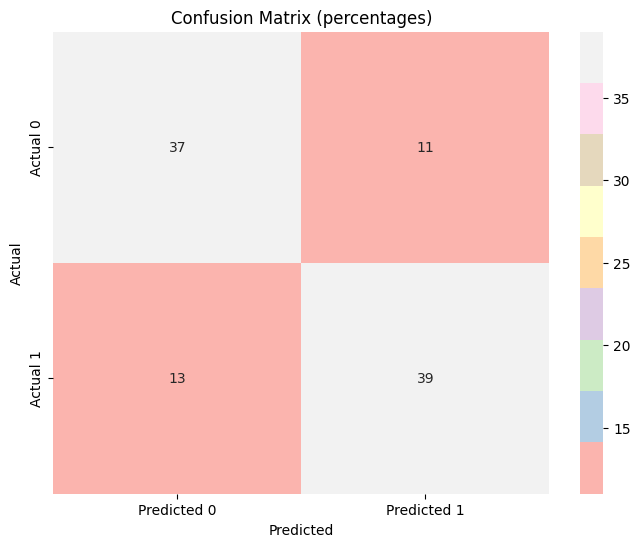

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (percentages)')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

y_true = [0]*37 + [1]*11 + [0]*13 + [1]*39
y_pred = [0]*37+ [0]*13 + [1]*11 + [1]*39

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print("Precision:", precision)


Precision: 0.78


In [ ]:
print("Recall",43/(38+43))

Recall 0.5308641975308642


LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the LSTM model
input_size = 1
hidden_size = 64
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)

Epoch [1/300], Loss: 0.6924824714660645, Accuracy: 52.00%
Epoch [2/300], Loss: 0.692400336265564, Accuracy: 52.00%
Epoch [3/300], Loss: 0.6923249959945679, Accuracy: 52.00%
Epoch [4/300], Loss: 0.6922479271888733, Accuracy: 52.00%
Epoch [5/300], Loss: 0.6921699643135071, Accuracy: 52.00%
Epoch [6/300], Loss: 0.6920923590660095, Accuracy: 52.00%
Epoch [7/300], Loss: 0.6920154094696045, Accuracy: 52.00%
Epoch [8/300], Loss: 0.691938042640686, Accuracy: 52.00%
Epoch [9/300], Loss: 0.6918594837188721, Accuracy: 52.00%
Epoch [10/300], Loss: 0.691780149936676, Accuracy: 52.00%
Epoch [11/300], Loss: 0.6916999816894531, Accuracy: 52.00%
Epoch [12/300], Loss: 0.6916192770004272, Accuracy: 52.00%
Epoch [13/300], Loss: 0.6915371417999268, Accuracy: 52.00%
Epoch [14/300], Loss: 0.691453218460083, Accuracy: 52.00%
Epoch [15/300], Loss: 0.6913672685623169, Accuracy: 52.00%
Epoch [16/300], Loss: 0.6912789344787598, Accuracy: 52.00%
Epoch [17/300], Loss: 0.6911882162094116, Accuracy: 52.00%
Epoch [18/

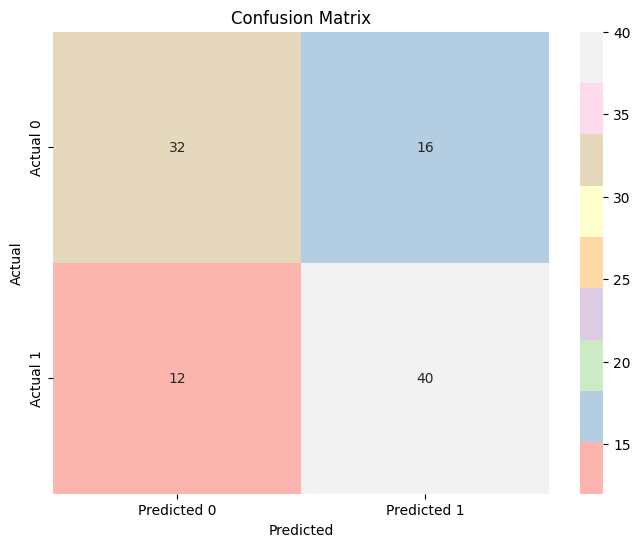

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score ,recall_score

# True labels (y_true) and predicted labels (y_pred)
y_true = [0]*32 + [1]*12 + [0]*16 + [1]*40
y_pred = [0]*32 + [0]*12 + [1]*16 + [1]*40

# Calculate precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)
recall = recall_score(y_true, y_pred)
print(f'Recall score: {recall:.2f}')



Precision: 0.7142857142857143
Recall score: 0.77


Hybrid GRU+LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the hybrid model with LSTM and GRU layers
class HybridModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_lstm, _ = self.lstm(x)
        out_gru, _ = self.gru(out_lstm)
        out = self.fc(out_gru[:, -1, :])
        return out

# Create the hybrid model
input_size = 1
hidden_size = 64
output_size = 1
model = HybridModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the hybrid model
num_epochs = 320
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')


# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/320], Loss: 0.6924992203712463, Accuracy: 52.00%
Epoch [2/320], Loss: 0.6924186944961548, Accuracy: 52.00%
Epoch [3/320], Loss: 0.6923487186431885, Accuracy: 52.00%
Epoch [4/320], Loss: 0.6922537088394165, Accuracy: 52.00%
Epoch [5/320], Loss: 0.6921778917312622, Accuracy: 52.00%
Epoch [6/320], Loss: 0.6921107769012451, Accuracy: 52.00%
Epoch [7/320], Loss: 0.6920304298400879, Accuracy: 52.00%
Epoch [8/320], Loss: 0.6919405460357666, Accuracy: 52.00%
Epoch [9/320], Loss: 0.6918536424636841, Accuracy: 52.00%
Epoch [10/320], Loss: 0.6917708516120911, Accuracy: 52.00%
Epoch [11/320], Loss: 0.6916812658309937, Accuracy: 52.00%
Epoch [12/320], Loss: 0.6915799975395203, Accuracy: 52.00%
Epoch [13/320], Loss: 0.6914737224578857, Accuracy: 52.00%
Epoch [14/320], Loss: 0.6913669109344482, Accuracy: 52.00%
Epoch [15/320], Loss: 0.6912524700164795, Accuracy: 52.00%
Epoch [16/320], Loss: 0.69112229347229, Accuracy: 52.00%
Epoch [17/320], Loss: 0.6909805536270142, Accuracy: 52.00%
Epoch [1

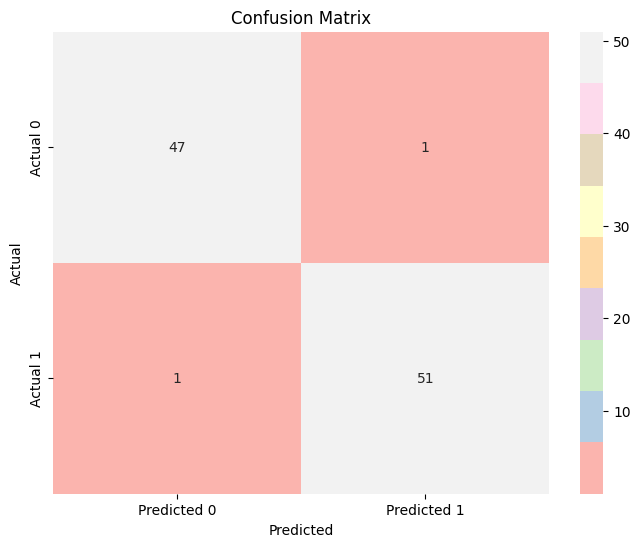

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score

# True labels
y_true = np.array([0] * 48 + [1] * 52)

# Predicted labels
y_pred = np.array([0] * 47 + [1] + [0] + [1] * 51)

# Calculate precision
recall = recall_score(y_true, y_pred)
print(f'Recall score: {recall:.2f}')
precision = precision_score(y_true, y_pred)
print("Precision:", precision)



Recall score: 0.98
Precision: 0.9807692307692307
